In [1]:
iris.vir <- subset(iris, Species == 'virginica')
modelA <- lm(Sepal.Length ~ Petal.Length, data = iris.vir)
summary(modelA)


Call:
lm(formula = Sepal.Length ~ Petal.Length, data = iris.vir)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73409 -0.23643 -0.03132  0.23771  0.76207 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.05966    0.46677    2.27   0.0277 *  
Petal.Length  0.99574    0.08367   11.90  6.3e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3232 on 48 degrees of freedom
Multiple R-squared:  0.7469,	Adjusted R-squared:  0.7416 
F-statistic: 141.6 on 1 and 48 DF,  p-value: 6.298e-16


In [3]:
 modelB <- lm(Sepal.Length ~ -1 + Petal.Length, data = iris.vir) 
summary(modelB)


Call:
lm(formula = Sepal.Length ~ -1 + Petal.Length, data = iris.vir)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80861 -0.23471 -0.04014  0.29192  0.85768 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Petal.Length 1.184769   0.008534   138.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3367 on 49 degrees of freedom
Multiple R-squared:  0.9975,	Adjusted R-squared:  0.9974 
F-statistic: 1.927e+04 on 1 and 49 DF,  p-value: < 2.2e-16


In [5]:
#To get the correlation matrix
summary(modelA, corr = TRUE)


Call:
lm(formula = Sepal.Length ~ Petal.Length, data = iris.vir)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73409 -0.23643 -0.03132  0.23771  0.76207 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.05966    0.46677    2.27   0.0277 *  
Petal.Length  0.99574    0.08367   11.90  6.3e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3232 on 48 degrees of freedom
Multiple R-squared:  0.7469,	Adjusted R-squared:  0.7416 
F-statistic: 141.6 on 1 and 48 DF,  p-value: 6.298e-16

Correlation of Coefficients:
             (Intercept)
Petal.Length -1.00      


In [6]:
with(iris.vir, cor(Sepal.Length,Petal.Length)^2)

[1] 0.7468844

In [7]:
summary(modelB, corr = TRUE)


Call:
lm(formula = Sepal.Length ~ -1 + Petal.Length, data = iris.vir)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80861 -0.23471 -0.04014  0.29192  0.85768 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Petal.Length 1.184769   0.008534   138.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3367 on 49 degrees of freedom
Multiple R-squared:  0.9975,	Adjusted R-squared:  0.9974 
F-statistic: 1.927e+04 on 1 and 49 DF,  p-value: < 2.2e-16


In [12]:
##P1,P2)
attach(iris.vir)
pred.values <- matrix(rep(0,100), ncol = 2)
for (i in 1:50) {
xx <- Petal.Length[-i]
yy <- Sepal.Length[-i]
model1 <- lm(yy ~ xx)
model2 <- lm(yy ~ -1 + xx)
pred.values[i,1] = predict(model1,data.frame(xx = Petal.Length[i]))
pred.values[i,2] = predict(model2,data.frame(xx = Petal.Length[i]))
}
pred.values <- cbind(pred.values,Sepal.Length)
colnames(pred.values) <- c('P1', 'P2', 'O')

In [14]:
head(pred.values)

P1,P2,O
7.059494,7.127763,6.3
6.149707,6.046441,5.8
6.929730,6.987623,7.1
6.642702,6.641590,6.3
6.843222,6.879872,6.5
7.634790,7.825795,7.6


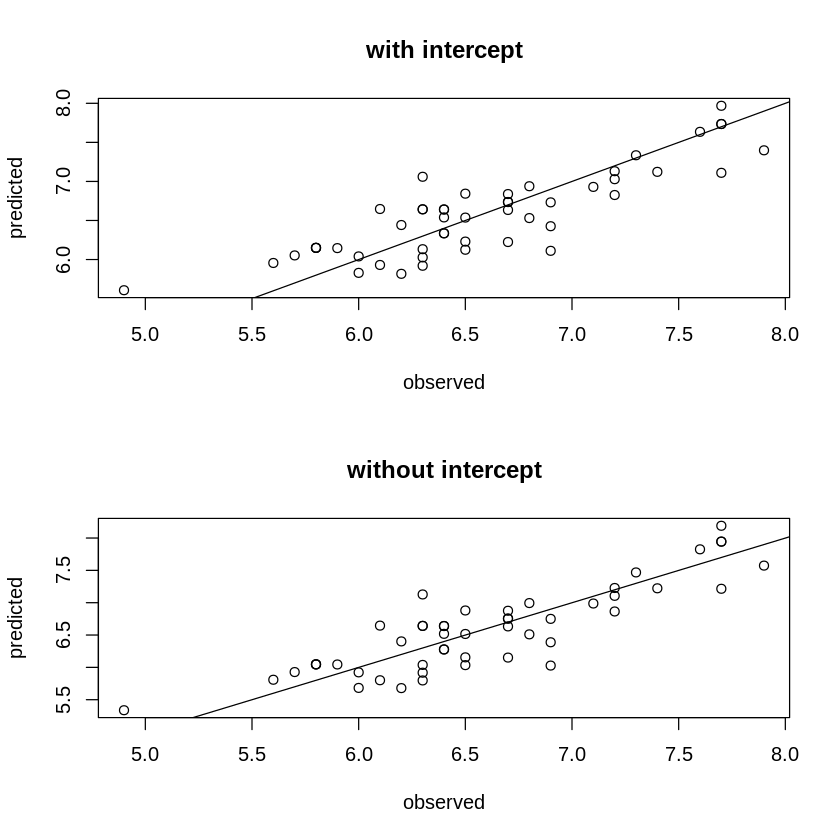

In [15]:
par(mfrow=c(2,1))
plot(pred.values[,3],pred.values[,1], ylab = 'predicted',
xlab = 'observed', main = 'with intercept')
abline(a=0,b=1)
plot(pred.values[,3],pred.values[,2], ylab = 'predicted', xlab = 'observed', main = 'without intercept')
abline(a=0,b=1)

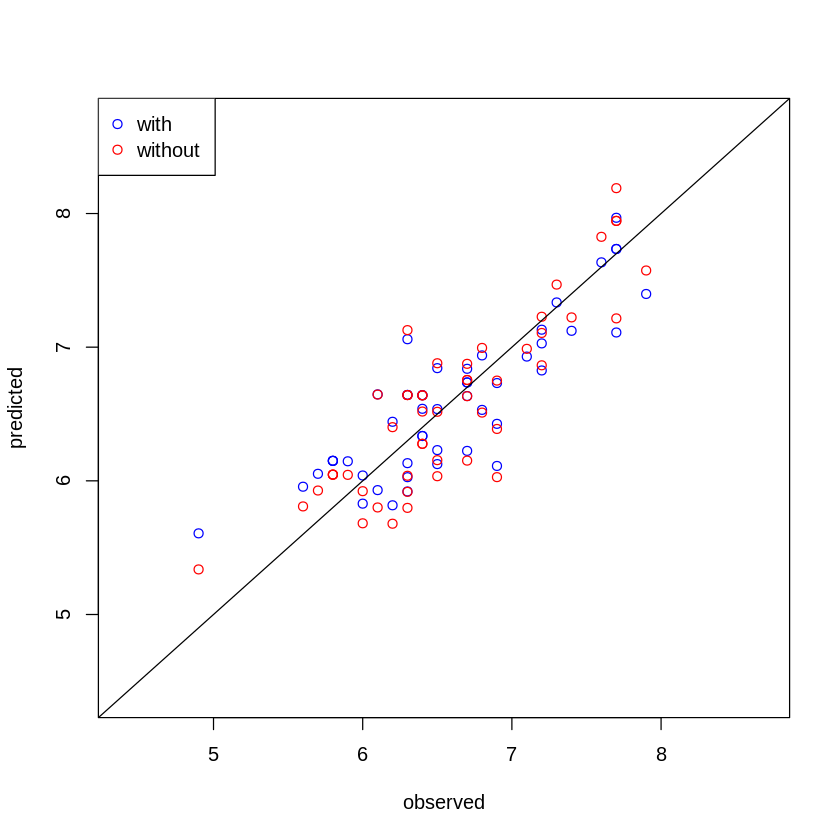

In [19]:
par(mfrow=c(1,1)) 
plot(pred.values[,3],pred.values[,1],
col = 'blue', ylab = 'predicted',
xlab = 'observed', xlim = (range(pred.values)+c(-.5,+.5)), ylim = (range(pred.values)+c(-.5,+.5)))
points(pred.values[,3],pred.values[,2], col = 'red') 
legend('topleft',c('with','without'),col=c('blue','red'),pch=c(1,1))
abline(0,1)

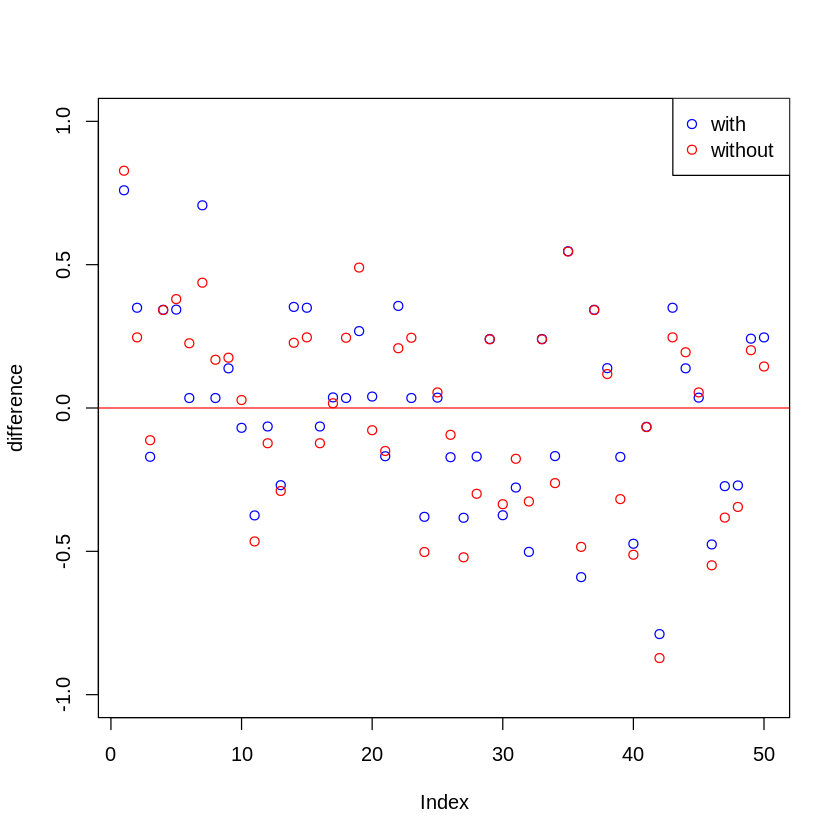

In [20]:
plot(pred.values[,1]-pred.values[,3], col = 'blue', ylab = 'difference', ylim = c(-1,1))
abline(h=0,col='red') 
points(pred.values[,2]-pred.values[,3], col = 'red')
legend('topright',c('with','without'),col=c('blue','red'),pch=c(1,1))

In [21]:
mean(abs(pred.values[,1]-pred.values[,3]))

[1] 0.2690842

In [22]:

mean(abs(pred.values[,2]-pred.values[,3]))

[1] 0.2855298

In [23]:
d <- read.csv("https://stats.idre.ucla.edu/wp-content/uploads/2019/02/elemapi2v2.csv")

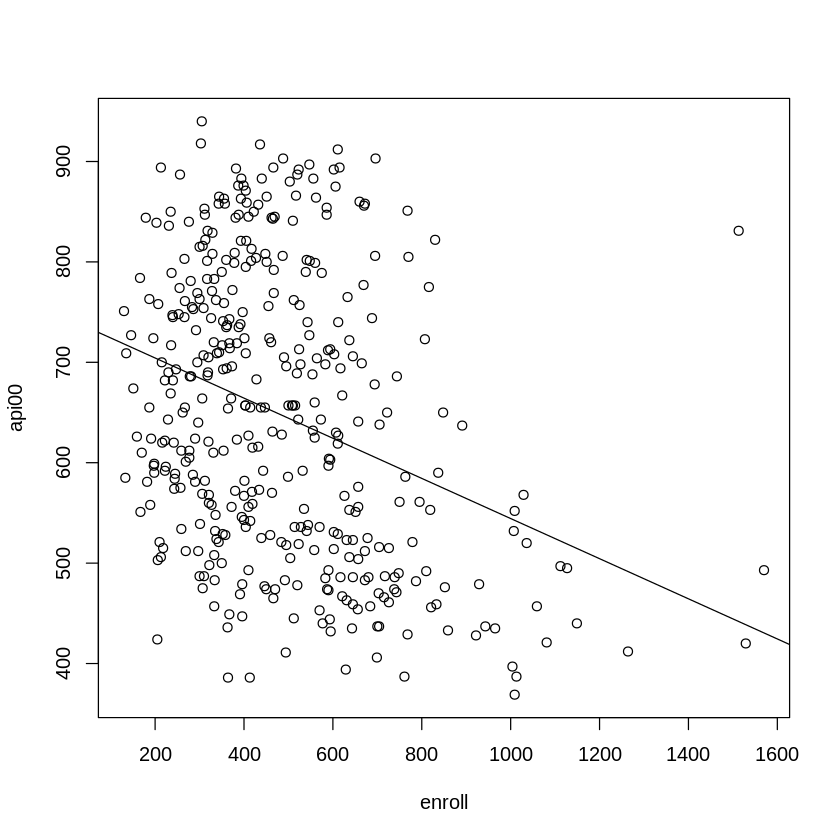

In [24]:
mod1 <- lm(api00 ~ enroll, data = d )
plot(api00 ~ enroll, data = d) 
abline(mod1)

Loading required package: carData



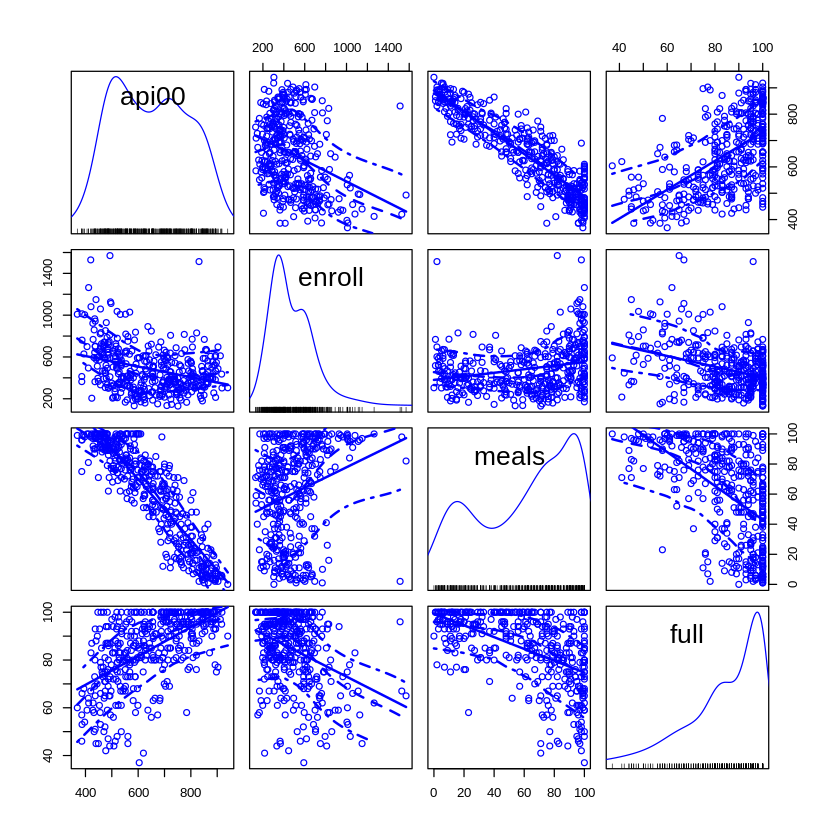

In [26]:
library(car)
scatterplotMatrix( ~ api00 + enroll + meals + full, data = d)

In [27]:
cor.ex2 <- cor(d[,c(3,6,18,20)])
library(corrplot)

corrplot 0.84 loaded



Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



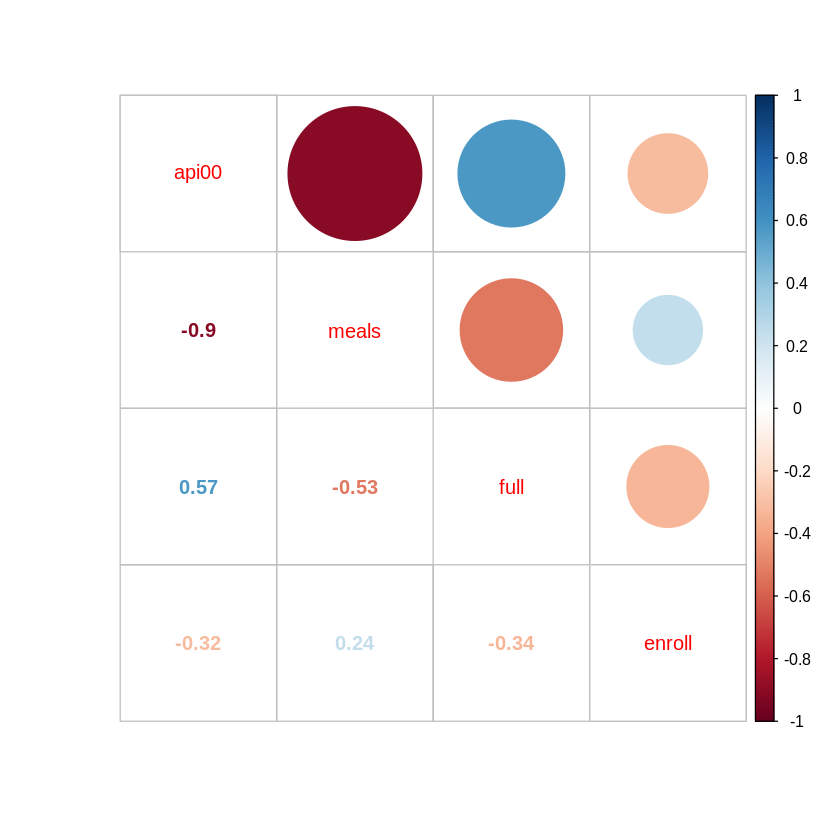

In [28]:
corrplot.mixed(cor.ex2)
library(GGally)

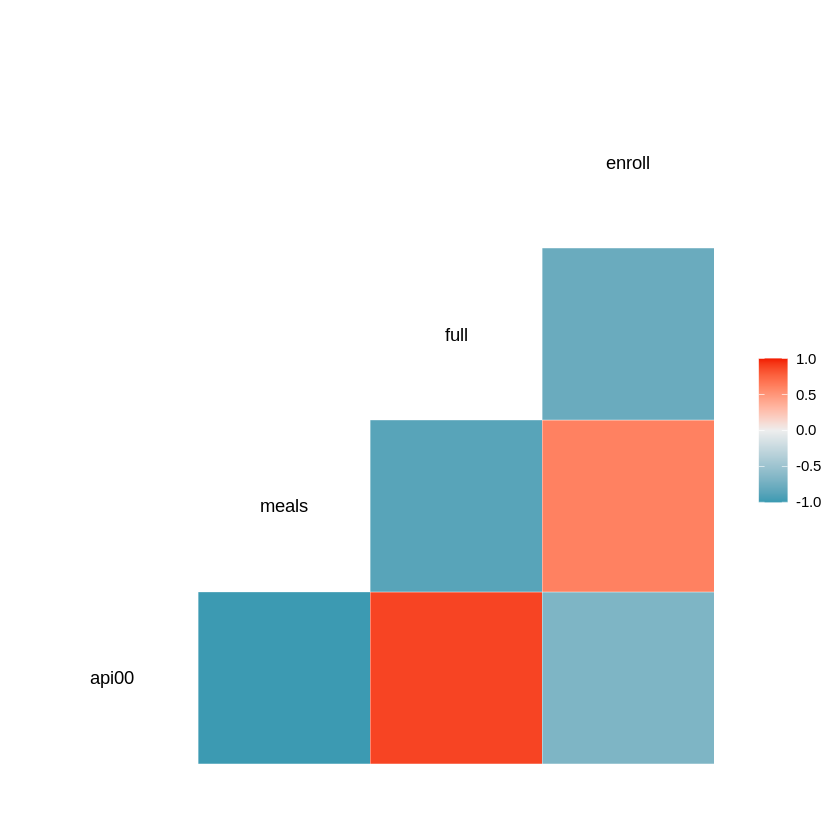

In [29]:
ggcorr(cor.ex2)

In [30]:
mod2 <- lm(api00 ~ enroll + meals + full, data = d) 
summary(mod2)


Call:
lm(formula = api00 ~ enroll + meals + full, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.721  -40.802    1.129   39.983  158.774 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 801.82983   26.42660  30.342  < 2e-16 ***
enroll       -0.05146    0.01384  -3.719 0.000229 ***
meals        -3.65973    0.10880 -33.639  < 2e-16 ***
full          1.08109    0.23945   4.515 8.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.73 on 396 degrees of freedom
Multiple R-squared:  0.8308,	Adjusted R-squared:  0.8295 
F-statistic: 648.2 on 3 and 396 DF,  p-value: < 2.2e-16


In [34]:
library(ISwR) 
data(cystfibr)

In [35]:
install.packages('ISwR')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



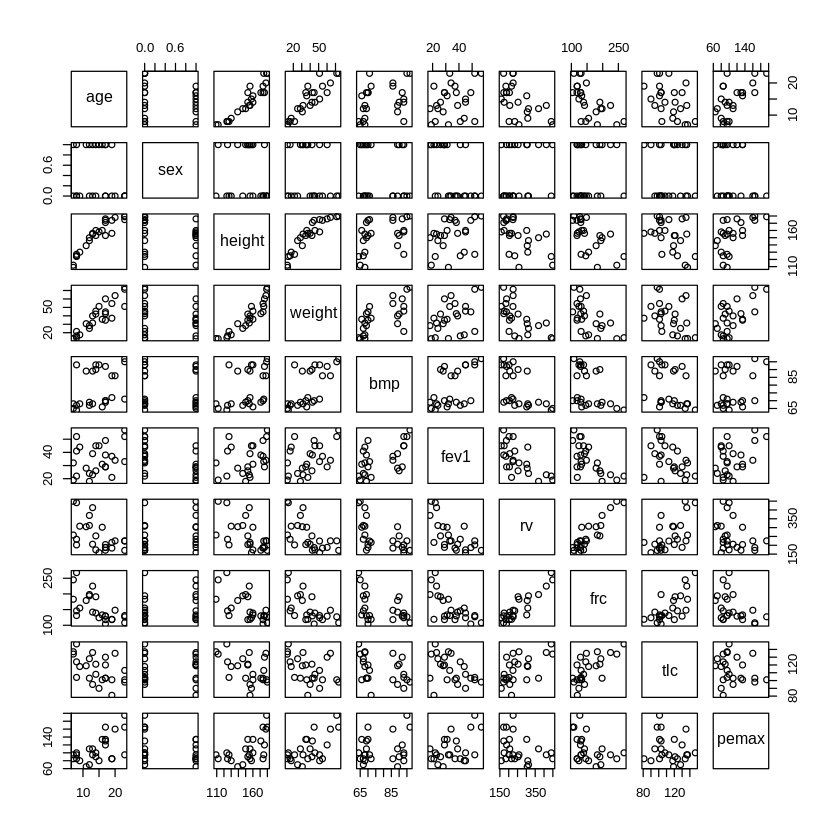

In [36]:
pairs(cystfibr)

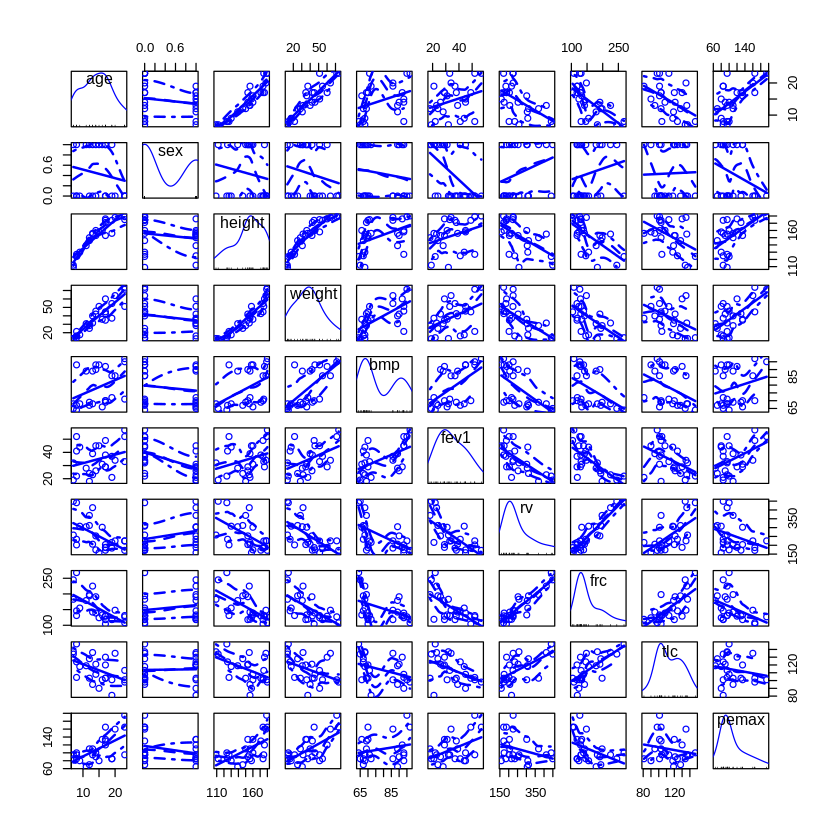

In [37]:
scatterplotMatrix(cystfibr)

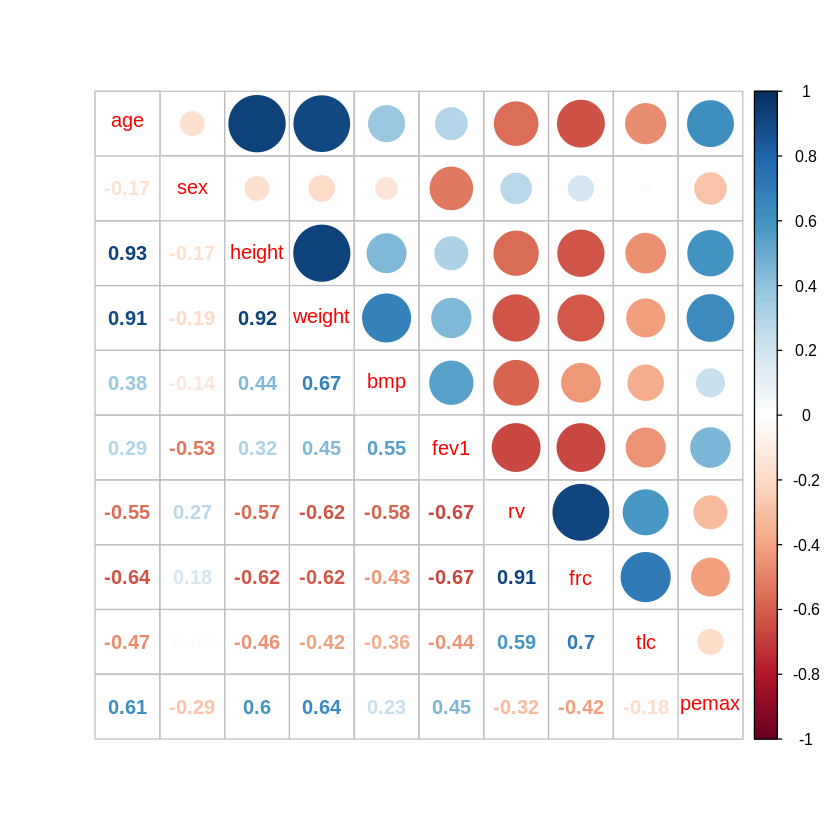

In [38]:
cor.ex3 <- cor(cystfibr) 
corrplot.mixed(cor.ex3)

In [39]:
model1 <- lm(pemax ~ ., data = cystfibr) 
summary(model1)


Call:
lm(formula = pemax ~ ., data = cystfibr)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.338 -11.532   1.081  13.386  33.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 176.0582   225.8912   0.779    0.448
age          -2.5420     4.8017  -0.529    0.604
sex          -3.7368    15.4598  -0.242    0.812
height       -0.4463     0.9034  -0.494    0.628
weight        2.9928     2.0080   1.490    0.157
bmp          -1.7449     1.1552  -1.510    0.152
fev1          1.0807     1.0809   1.000    0.333
rv            0.1970     0.1962   1.004    0.331
frc          -0.3084     0.4924  -0.626    0.540
tlc           0.1886     0.4997   0.377    0.711

Residual standard error: 25.47 on 15 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.4197 
F-statistic: 2.929 on 9 and 15 DF,  p-value: 0.03195


In [40]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,10098.47798,10098.47798,15.5660553,0.001295644
sex,1,955.42783,955.42783,1.4727212,0.243680466
height,1,154.96997,154.96997,0.2388747,0.632088600
weight,1,632.33540,632.33540,0.9746981,0.339169851
bmp,1,2862.21621,2862.21621,4.4118941,0.053010260
fev1,1,1549.08175,1549.08175,2.3877947,0.143119679
rv,1,561.92413,561.92413,0.8661644,0.366756803
frc,1,194.55364,194.55364,0.2998900,0.592007328
tlc,1,92.40351,92.40351,0.1424332,0.711160307


In [41]:
model2 <- lm(pemax ~ age, data = cystfibr) 
summary(model2)


Call:
lm(formula = pemax ~ age, data = cystfibr)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.666 -17.174   6.209  16.209  51.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   50.408     16.657   3.026  0.00601 **
age            4.055      1.088   3.726  0.00111 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.97 on 23 degrees of freedom
Multiple R-squared:  0.3764,	Adjusted R-squared:  0.3492 
F-statistic: 13.88 on 1 and 23 DF,  p-value: 0.001109


In [42]:
anova(model1, model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15,9731.25,NA,NA,NA,NA
2,23,16734.16,-8,-7002.912,1.349309,0.2935554


In [43]:
model3 <- lm(pemax ~ height + age + sex + weight + bmp + fev1 + rv + frc + tlc, data = cystfibr)
summary(model3)


Call:
lm(formula = pemax ~ height + age + sex + weight + bmp + fev1 + 
    rv + frc + tlc, data = cystfibr)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.338 -11.532   1.081  13.386  33.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 176.0582   225.8912   0.779    0.448
height       -0.4463     0.9034  -0.494    0.628
age          -2.5420     4.8017  -0.529    0.604
sex          -3.7368    15.4598  -0.242    0.812
weight        2.9928     2.0080   1.490    0.157
bmp          -1.7449     1.1552  -1.510    0.152
fev1          1.0807     1.0809   1.000    0.333
rv            0.1970     0.1962   1.004    0.331
frc          -0.3084     0.4924  -0.626    0.540
tlc           0.1886     0.4997   0.377    0.711

Residual standard error: 25.47 on 15 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.4197 
F-statistic: 2.929 on 9 and 15 DF,  p-value: 0.03195


In [44]:
anova(model3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
height,1,9634.63584,9634.63584,14.8510770,0.001562045
age,1,646.18315,646.18315,0.9960434,0.334098303
sex,1,928.05678,928.05678,1.4305307,0.250242735
weight,1,632.33540,632.33540,0.9746981,0.339169851
bmp,1,2862.21621,2862.21621,4.4118941,0.053010260
fev1,1,1549.08175,1549.08175,2.3877947,0.143119679
rv,1,561.92413,561.92413,0.8661644,0.366756803
frc,1,194.55364,194.55364,0.2998900,0.592007328
tlc,1,92.40351,92.40351,0.1424332,0.711160307


In [45]:
model4 <- lm(pemax ~ height, data = cystfibr) 
summary(model4)


Call:
lm(formula = pemax ~ height, data = cystfibr)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.876 -19.306   1.787  18.170  61.464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -33.2757    40.0445  -0.831  0.41453   
height        0.9319     0.2596   3.590  0.00155 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.34 on 23 degrees of freedom
Multiple R-squared:  0.3591,	Adjusted R-squared:  0.3312 
F-statistic: 12.89 on 1 and 23 DF,  p-value: 0.001549


In [46]:
anova(model3, model4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15,9731.25,NA,NA,NA,NA
2,23,17198.00,-8,-7466.755,1.438681,0.2587877


In [ ]:
#, a p-value of less than 0.05 indicates that the models are significantly different
#, whereas a value exceeding 0.05 provides no such evidence.